In [2]:
import traceback
from pathlib import Path

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

import xarray as xr

import earthcarekit as eck


In [10]:

def cats_to_bounds(l):
    return np.array(l + [l[-1]+1]) - 0.5

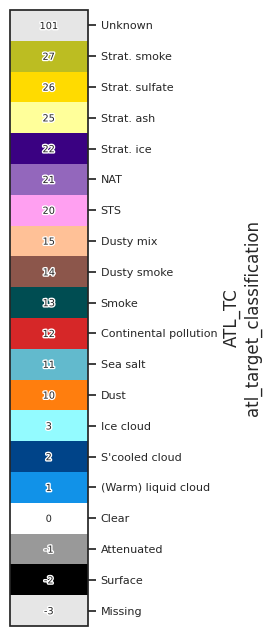

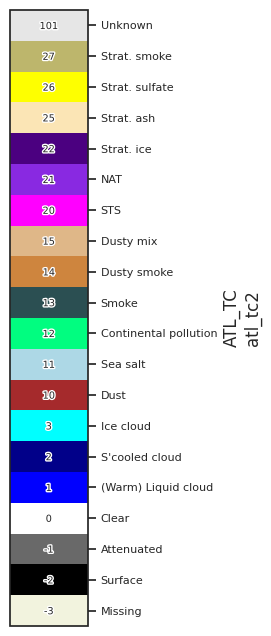

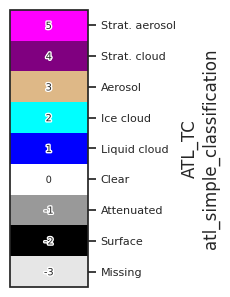

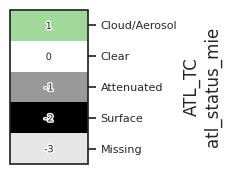

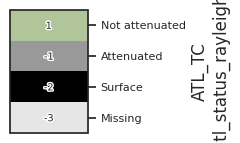

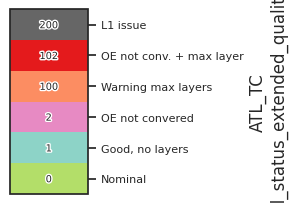

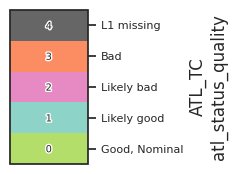

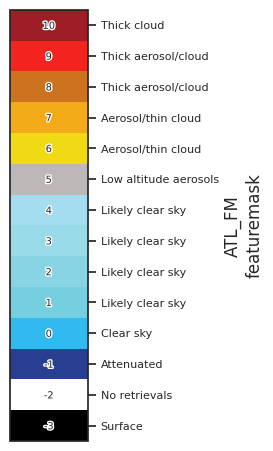

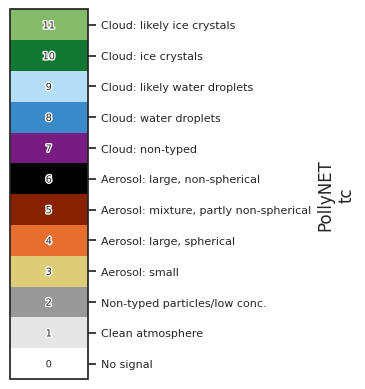

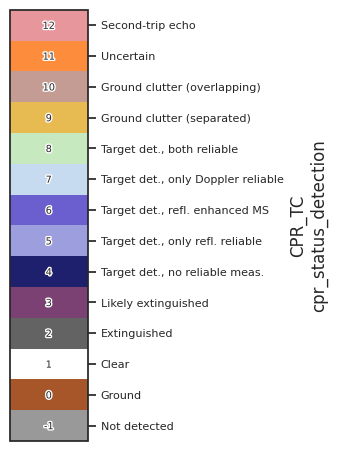

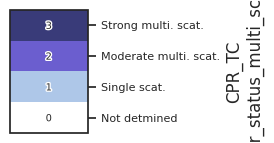

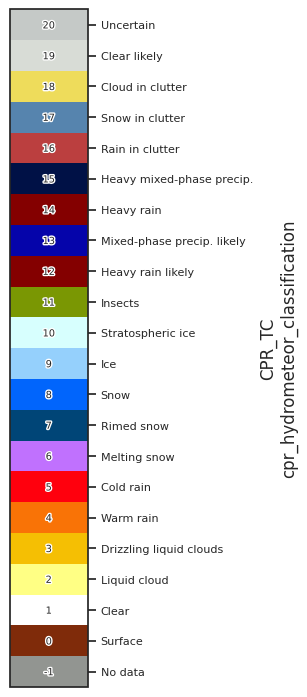

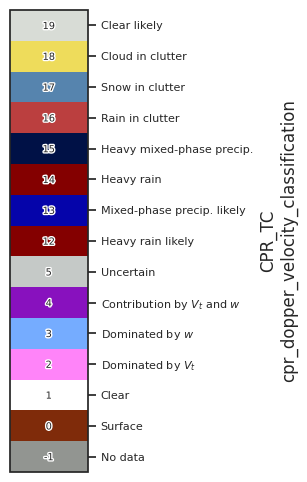

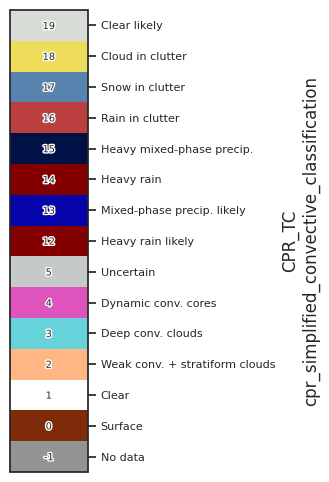

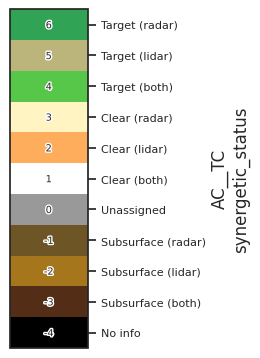

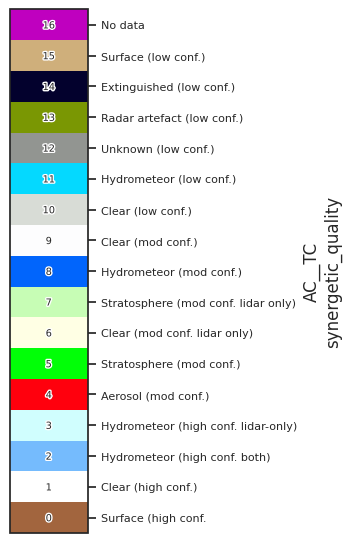

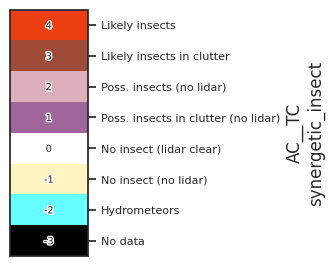

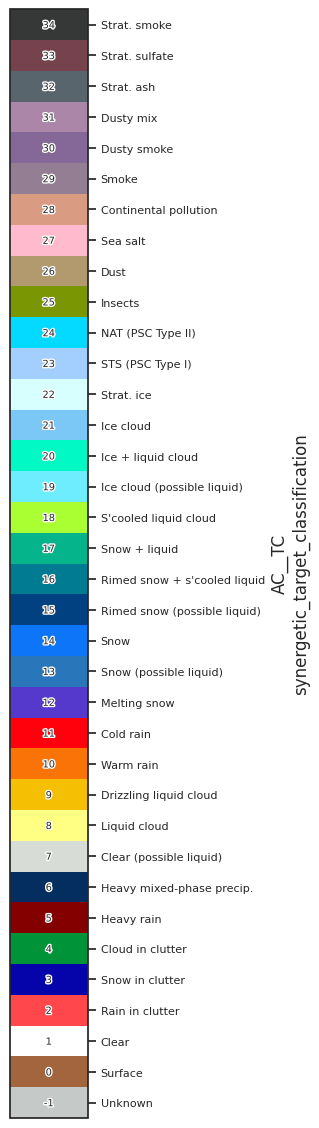

In [13]:
#product = 'ATL_TC'
#name = 'atl_target_classification'
#color_defs = eck.plot.color.colormap.atl_target_classification.cmap_data

cat_colormaps = [
    ['ATL_TC', 'atl_target_classification',
     eck.plot.color.colormap.atl_target_classification.cmap_data],
    ['ATL_TC', 'atl_tc2',
     eck.plot.color.colormap.atl_target_classification.cmap2_data],
    ['ATL_TC', 'atl_simple_classification',
     eck.plot.color.colormap.atl_simple_classification.cmap_data],
    ['ATL_TC', 'atl_status_mie',
     eck.plot.color.colormap.atl_status.cmap_data_mie],
    ['ATL_TC', 'atl_status_rayleigh',
     eck.plot.color.colormap.atl_status.cmap_data_rayleigh],
    ['ATL_TC', 'atl_status_extended_quality',
     eck.plot.color.colormap.atl_status.cmap_data_extq],
    ['ATL_TC', 'atl_status_quality',
     eck.plot.color.colormap.atl_status.cmap_data_q],
    ['ATL_FM', 'featuremask',
     eck.plot.color.colormap.featuremask.cmap_data],

    ['PollyNET', 'tc',
     eck.plot.color.colormap.pollynet_target_classification.cmap_data],

    ['CPR_TC', 'cpr_status_detection',
     eck.plot.color.colormap.cpr_status.cmap_data_detection],
    ['CPR_TC', 'cpr_status_multi_scat',
     eck.plot.color.colormap.cpr_status.cmap_data_multi_scat],
    ['CPR_TC', 'cpr_hydrometeor_classification',
     eck.plot.color.colormap.cpr_target_classification.cmap_data_cpr_hydromet],
    ['CPR_TC', 'cpr_dopper_velocity_classification',
     eck.plot.color.colormap.cpr_target_classification.cmap_data_cpr_vel],
    ['CPR_TC', 'cpr_simplified_convective_classification',
     eck.plot.color.colormap.cpr_target_classification.cmap_data_cpr_conv],

    ['AC__TC', 'synergetic_status',
     eck.plot.color.colormap.synergistic_status.cmap_data_status],
    ['AC__TC', 'synergetic_quality',
     eck.plot.color.colormap.synergistic_status.cmap_data_quality],
    ['AC__TC', 'synergetic_insect',
     eck.plot.color.colormap.synergistic_status.cmap_data_insect],
    ['AC__TC', 'synergetic_target_classification',
     eck.plot.color.colormap.synergistic_target_classification.cmap_data],
]


for product, name, color_defs in cat_colormaps:
    fig, ax = plt.subplots(figsize=(1, len(color_defs)*0.4))
    
    cmap = (matplotlib.colors.ListedColormap([c[1] for c in color_defs]))
    bounds = cats_to_bounds([c[0] for c in color_defs])
    bounds = np.arange(len(color_defs)+1) - 0.5
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
                       cax=ax, orientation='vertical',
                       label=f"{product}\n{name}")
    
    cbar.set_ticks(
        #ticks = list(cats.keys()),
        ticks = np.arange(len(color_defs)),
        labels = [c[2] for c in color_defs],
        fontsize = 8
    )
    
    cbar.ax.minorticks_off() # suddenly minor ticks appeared
    
    for i, n in enumerate([c[0] for c in color_defs]):
        cbar.ax.text(
            0.5, i-0.02, n, fontsize=7,
            path_effects=[matplotlib.patheffects.withStroke(linewidth=2, foreground="white")],
            verticalalignment='center', horizontalalignment='center',
            )
    
    outname = f"{product}_{name}.png"
    fig.savefig(outname, dpi=200, bbox_inches='tight')